In [1]:
import pandas as pd
import numpy as np

from time import sleep
from random import randint
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS

from scipy import optimize

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
          'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
          'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
          'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
          'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
          'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
          'Wisconsin', 'Wyoming']

I will now convert the list of states into a suitable format for the data scraping. Specifically, worldometers uses lowercase in its URL format, and replaces each space with a hyphen.

In [3]:
states = [state.lower().replace(' ','-') for state in states]

The general format for the worldometer URL is 

https://www.worldometers.info/coronavirus/usa/'+state+'/'

I loop through the list of states, substituting each in turn into the URL format, and use urllib to retrieve the HTML code.

With the HTML code in hand, I can find the list of daily case numbers. These daily case numbers begin on March 12, 2020 and continue to the present day. The data was harvested on June 24, 2021, so that is the last date for each of the records in this data frame. 

In [4]:
# # fetch the daily case numbers data from worldometers

# data = {}
# for state in states:
#     req = Request('https://www.worldometers.info/coronavirus/usa/'+state+'/',
#                                 headers={'User-Agent': 'Mozilla/5.0'})
#     webpage = urlopen(req).read()
#     html = webpage.decode("utf8")
#     soup = BS(html,'lxml')
#     ls = html.split('Novel Coronavirus Daily Cases')[1].split('data: [')[1].split(']')[0]
#     data[state]=ls.split(',')
#     sleep(randint(5,13))

# # convert the data to a dataframe
# df_full = pd.DataFrame(data)

#  ''' The dataframe comes with strings instead of integers for entries. Also, there are some "null"
#      entries. They don't contribute to the tallies in worldometers, so I assume that null should
#      correspond to 0. I will now define a function and apply it to the data frame which will handle
#      these cleanup steps.
# '''
# def convert_to_int(x):
#     res = []
#     for entry in x:
#         try: res.append(int(entry))
#         except: res.append(0)
#     return(np.asarray(res))
    
# df_full = df_full.apply(convert_to_int)

# # I will save a copy of the data, so that I don't have to keep hitting worldometers with
# # request traffic each time I run the notebook.
# df_full.to_csv('data_full.csv')

# load the data from file
df_full = pd.read_csv('https://raw.githubusercontent.com/cabriggs/covid-19-january-2021-cases/main/data_full.csv')

The last date of daily case numbers I am looking at for this study is January 31, 2021. So I will truncate the data frame at this date. January 31, 2021 is 325 days after March 12, 2020.

In [5]:
df = df_full.iloc[:325,:]

In [6]:
df.head()

,Unnamed: 0,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district-of-columbia,...,south-dakota,tennessee,texas,utah,vermont,virginia,washington,west-virginia,wisconsin,wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,316,0,0,3,45,28,6,0,0,...,1,-17,16,4,0,12,126,0,2,0
2,2,64,0,3,3,77,24,12,2,0,...,0,0,13,1,3,11,74,0,11,2
3,3,77,0,1,4,67,30,3,1,8,...,0,5,16,18,3,4,127,0,14,0
4,4,67,0,5,6,134,29,15,1,4,...,1,4,12,11,4,6,135,0,13,0


In [7]:
# do some summary statistics
df.describe()

,Unnamed: 0,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district-of-columbia,...,south-dakota,tennessee,texas,utah,vermont,virginia,washington,west-virginia,wisconsin,wyoming
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,162.000000,1465.430769,162.156923,2318.061538,914.089231,10193.144615,1215.283077,769.286154,242.255385,112.775385,...,332.498462,2208.843077,7390.095385,1062.846154,36.396923,1545.240000,967.596923,370.283077,1811.003077,159.086154
std,93.963645,1324.627164,200.618834,2747.456065,870.146717,12596.337772,1439.598420,1336.451315,257.503121,89.518441,...,401.022240,2299.368282,6628.768258,1087.257614,51.385489,1528.028922,1028.099653,475.430494,1940.831179,240.195173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,...,0.000000,-17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,523.000000,13.000000,402.000000,255.000000,2560.000000,300.000000,29.000000,75.000000,49.000000,...,61.000000,472.000000,1649.000000,244.000000,4.000000,645.000000,316.000000,34.000000,358.000000,13.000000
50%,162.000000,1061.000000,79.000000,1030.000000,704.000000,4938.000000,459.000000,220.000000,134.000000,80.000000,...,133.000000,1532.000000,5803.000000,567.000000,10.000000,951.000000,563.000000,143.000000,919.000000,42.000000
75%,243.000000,2066.000000,224.000000,3476.000000,1178.000000,10328.000000,1689.000000,796.000000,336.000000,155.000000,...,452.000000,2759.000000,10736.000000,1735.000000,51.000000,1551.000000,1160.000000,543.000000,2882.000000,213.000000
max,324.000000,6812.000000,885.000000,17234.000000,4344.000000,61869.000000,6439.000000,8457.000000,1240.000000,492.000000,...,2138.000000,11806.000000,32055.000000,4707.000000,245.000000,9914.000000,6621.000000,2148.000000,8520.000000,1262.000000


In [8]:
# a function to graph the daily new cases for a state
def show_cases(state,length = 0):
    ys = np.asarray(df_full[state])
    xs = pd.date_range(periods=len(ys),start="2020-03-12")
    if length>0:
        ys = ys[-length:]
        xs = xs[-length:]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('cases per day')
    ax.set_title('New daily COVID-19 cases - {}{}'.format(state[0].upper(),state[1:]))
    ax.bar(xs,ys)
    plt.show()

The daily new coronavirus cases shows a multiple wave behavior. The following examples are typical.

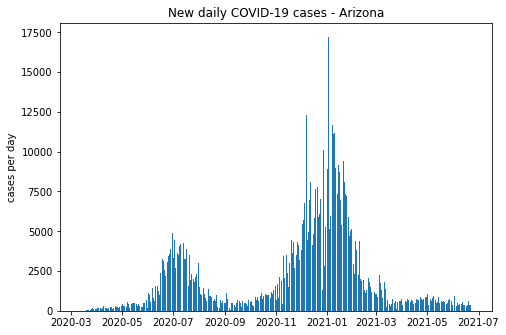

In [9]:
show_cases('arizona')

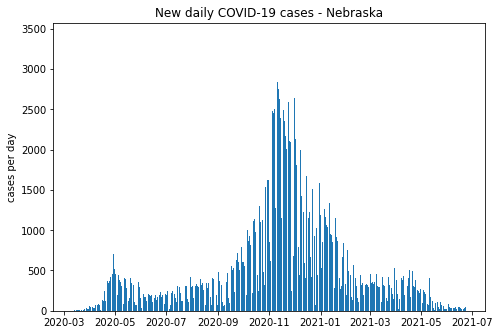

In [10]:
show_cases('nebraska')

There are exceptions to this rule, but on average, there is a "winter wave" which will be the focus of my analysis.

In [11]:
# identifying by hand the start date of the winter wave in each state

''' data offsets:
    Mar 12 = 0
    Apr 00 = 20
    May 00 = 50
    Jun 00 = 81
    Jul 00 = 111
    Aug 00 = 142
    Sep 00 = 173
    Oct 00 = 203
    Nov 00 = 234
    Dec 00 = 264
'''
months = {'mar':-12,'apr':20,'may':50,'jun':81,'jul':111,
          'aug':142,'sep':173,'oct':203,'nov':234,'dec':264}

start_dates = {'alabama': 'oct 15','alaska': 'sep 15','arizona': 'oct 15','arkansas': 'nov 01',
               'california': 'nov 01','colorado': 'oct 15','connecticut': 'oct 01','delaware': 'nov 01',
               'district-of-columbia': 'nov 01','florida': 'oct 15','georgia': 'nov 01','hawaii': 'nov 01',
               'idaho': 'sep 15','illinois': 'oct 01','indiana': 'oct 01','iowa': 'oct 01',
               'kansas': 'oct 01','kentucky': 'oct 01','louisiana': 'oct 15','maine': 'oct 15',
               'maryland': 'oct 15','massachusetts': 'oct 15','michigan': 'oct 01','minnesota': 'oct 01',
               'mississippi': 'oct 01','missouri': 'oct 15','montana': 'sep 15','nebraska': 'oct 01',
               'nevada': 'oct 01','new-hampshire': 'oct 15','new-jersey': 'oct 15','new-mexico': 'sep 15',
               'new-york': 'oct 15','north-carolina': 'nov 01','north-dakota': 'sep 01','ohio': 'oct 01',
               'oklahoma': 'nov 01','oregon': 'oct 15','pennsylvania': 'oct 01','rhode-island': 'sep 15',
               'south-carolina': 'nov 01','south-dakota': 'sep 15','tennessee': 'nov 01','texas': 'oct 21',
               'utah': 'sep 01','vermont': 'oct 15','virginia': 'nov 01','washington': 'oct 21',
               'west-virginia': 'oct 15','wisconsin': 'sep 01','wyoming': 'sep 01'
              }

# convert the offset to number of days since 3/12/20
def get_offset(state):
    date_str = start_dates[state]
    offset = months[date_str.split()[0]]+int(date_str.split()[1])
    return(offset)

I will now create a function which will accept as input a date (measured in days since the beginning of the truncated data for the particular state) and will return the predicted number of cases for that day.

In [12]:
# define the generic model function
def model_f(x,a,b,c):
    y = a*np.exp(-np.abs((x-b)/c))
    return(y)

def predict(x,params):
    a = params[0]
    b = params[1]
    c = params[2]
    y = model_f(x,a,b,c)
    return(int(y))

In [13]:
prediction_data = []

# Create a list of dictionaries to convert to a dataframe. Each row will be a state.
for state in states:
    dct = {'state':state}
    offset = get_offset(state)
    daily_cases = df[state][offset:].values

    # predicting for the first half of January
    num = 31
    # I stopped the training data two weeks early so as to avoid the Christmas holiday effects
    data = daily_cases[:-num-14]
    params, cov = optimize.curve_fit(model_f,
                                     xdata=np.arange(len(data)),
                                     ydata=data,
                                     maxfev=20000,
                                     p0=[np.max(data), 1, 1])

    ls = []
    # make predictions for January 1, 2, ..., 16
    for i in range(num,num-16,-1):
        ls.append(predict(len(daily_cases)-i,params))
    early_pred = [_ for _ in ls]
    early_actual = [_ for _ in daily_cases[-31:-15]]
    early_error = [j-i for (i,j) in zip(early_pred,early_actual)]

    # predicting for the second half of January
    num = 15
    data = daily_cases[:-num]
    params, cov = optimize.curve_fit(model_f,
                                     xdata=np.arange(len(data)),
                                     ydata=data,
                                     maxfev=20000,
                                     p0=[np.max(data), 1, 1])

    ls = []
    # make predictions for January 17, 18, ..., 31
    for i in range(num,num-15,-1):
        ls.append(predict(len(daily_cases)-i,params))
    late_pred = [_ for _ in ls]
    late_actual = [_ for _ in daily_cases[-15:]]
    late_error = [j-i for (i,j) in zip(late_pred,late_actual)]

    # assemble the early and late january pieces into a single piece for each of prediction, actual, error
    predicted = early_pred + late_pred
    actual = early_actual + late_actual
    error = early_error + late_error
    pct_error = [round(i/j,3) if j!= 0 else np.nan for (i,j) in zip(error,actual)]
    dct['predicted'] = predicted
    dct['actual'] = actual
    dct['error'] = error
    dct['pct_error'] = pct_error

    prediction_data.append(dct)
    
# convert the list of dictionaries into a dataframe
pred_df = pd.DataFrame(prediction_data)

In [14]:
# declare a vector of 31 zeros, to hold the count of positive errors over all states per day of January
pos_error_count = [0 for i in range(31)]

for state in states:
    ls = pred_df[pred_df['state']==state]['error'].values[0]
    for i in range(31):
        if ls[i]>0: pos_error_count[i]+=1

pos_error_pct = [_/len(states) for _ in pos_error_count]

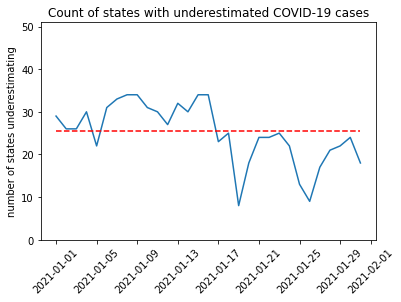

In [15]:
x = pd.date_range(periods=31,end="2021-01-31")
y = pos_error_count
horiz_line = [25.5 for _ in range(31)]
plt.plot(x, y, label = "things")
plt.plot(x, horiz_line, 'r--')
plt.ylim(0,51)
plt.xticks(rotation = 45)
plt.ylabel('number of states underestimating')
plt.title('Count of states with underestimated COVID-19 cases')
plt.show()

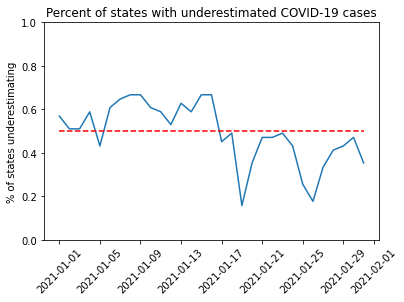

In [16]:
x = pd.date_range(periods=31,end="2021-01-31")
y = pos_error_pct
horiz_line = [0.5 for _ in range(31)]
plt.plot(x, y, label = "things")
plt.plot(x, horiz_line, 'r--') 
plt.ylim(0,1)
plt.xticks(rotation = 45)
plt.ylabel('% of states underestimating')
plt.title('Percent of states with underestimated COVID-19 cases')

plt.show()

Two main things about the graph:

1. The graph appears to be rather above the red line for the first half of the month. This is not necessarily unexpected, as the first half of January follows the winter holidays. In addition to fewer people being diagnosed due to business closures / travel, more people were also probably infected.

2. The graph appears to be rather below the red line for the second half of the month. This is unexpected, all else being equal, as it follows on the heels of a high case load. Remember, the fact that the graph has dropped below the middle line does _not_ simply indicate that the case numbers have dropped, even a lot. It indicates that the case numbers have droppped off at a rate _faster_ than predicted by the exponential model as trained on the past several months of data. That is, this graph dropping significantly below the red line indicates that there has been a much sharper than expected decline in the case numbers.

In [17]:
# now graph the percentage overestimates by date in January

state = 'hawaii'

np.asarray(pred_df[pred_df['state']==state]['pct_error'])

array([list([0.437, 0.557, 0.367, 0.282, -0.204, 0.124, 0.242, 0.665, 0.592, 0.562, 0.452, 0.367, 0.05, -0.036, 0.372, 0.268, -0.046, -0.346, -0.37, -1.791, -1.423, -0.528, -0.409, -0.403, -0.247, -0.567, -2.0, -0.88, -0.971, -0.719, -0.736])],
      dtype=object)

I will create a heatmap with states as rows and dates as columns. The color will correspond to the % error, from -100% to 100%.

In [18]:
# generating data for the heatmap

heatmap_data = []
for state in states:
    heatmap_data.append([x for x in pred_df[pred_df['state']==state]['pct_error']][0])
np.asarray(heatmap_data)

array([[-0.116, -0.484, -1.895, ..., -1.159, -1.342, -1.733],
       [ 0.134,  0.332, -0.055, ...,  0.195,  0.232, -0.031],
       [ 0.537,  0.658,  0.627, ..., -1.877, -1.727, -1.734],
       ...,
       [-0.228,  0.023, -0.256, ..., -0.933, -1.024, -0.949],
       [ 0.414,  0.291, -0.883, ...,  0.358,  0.278,  0.274],
       [ 0.442,    nan,  0.134, ..., -0.242,  0.715, -4.071]])

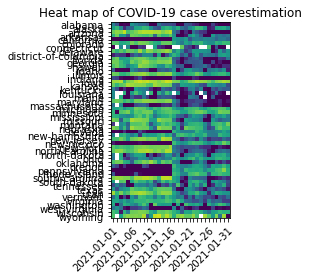

In [19]:
# now create a dataframe where the rows are states and the columns are
# % over/underestimate on each day of January.
# use it to graph a heat map

# custom label list for the heatmap
x_labels_spaced = ['2021-01-01', ' ', ' ', ' ', ' ',
                   '2021-01-06', ' ', ' ', ' ', ' ',
                   '2021-01-11', ' ', ' ', ' ', ' ',
                   '2021-01-16', ' ', ' ', ' ', ' ',
                   '2021-01-21', ' ', ' ', ' ', ' ',
                   '2021-01-26', ' ', ' ', ' ', ' ',
                   '2021-01-31'
                  ]

# uniform_data = np.random.rand(10, 12)
fig, ax = plt.subplots()
im = ax.imshow(heatmap_data, vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(x_labels_spaced)))
ax.set_yticks(np.arange(len(states)))
ax.set_yticklabels(states)
ax.set_xticklabels(x_labels_spaced)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Heat map of COVID-19 case overestimation")
fig.tight_layout()
plt.show()

The labels above are good, but they are slightly misaligned to the rows, and I don't like the white lines in the heatmap. I will create a cleaner heatmap, and add on the labels in image editing software for inclusion in the report.

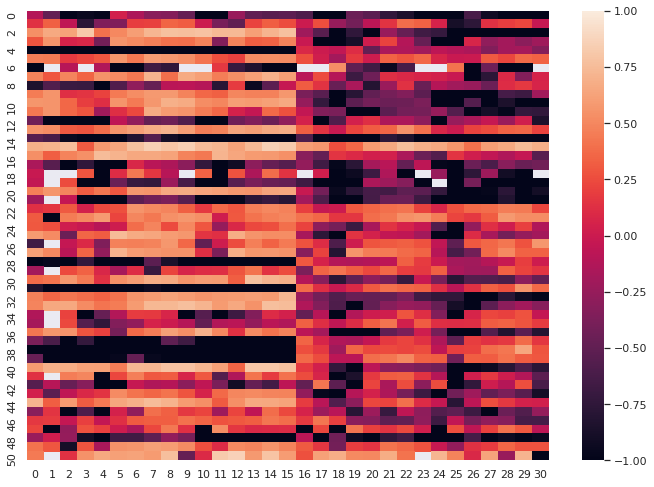

In [20]:
# generating a better view of the heatmap

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(heatmap_data, vmin=-1, vmax=1)

Appendix: put in the full data table? From Nov 1 to Feb 1? Technical details on function fitting? Technical details on the prediction method? Leave the most technical details out of the report, and put them in the appendix.

A standard Gaussian curve is a function of the form

$f(x) = a \cdot \exp\left(-\frac 1 2 \left(\frac{x-b}{c}\right)^2\right)$.

The center of the curve is at $x=b$. As $x$ is removed from $b$ in either direction (to the right or left), the negative<br>exponent on $e$ increases rapidly. This rapid increase is largely due to the square in $\left(\frac{x-b}{c}\right)^2$. Another important<br>feature of the square is that it gives the curve symmetry over $x=b$.

If we wish to fatten the tails of the distribution, we might take the absolute value instead of squaring. Our function<br>then has the form

$g(x) = a \cdot \exp\left(-\frac 1 2 \left|\frac{x-b}{c}\right|\right)$.

For comparison, here are plots of $f$ and $g$ using the parameters $a=c=1, b=0$:

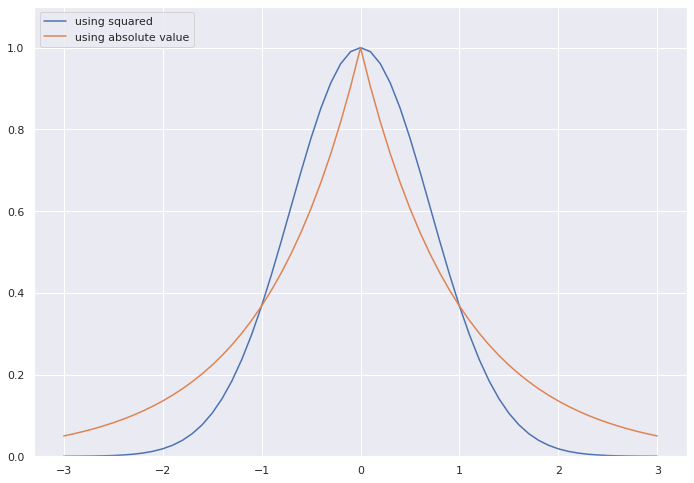

In [21]:
# a typical Gaussian function
def gauss_f(x):
    return(np.exp(-x*x))

# a function of the sort used to model the winter 2020-21 COVID-19 wave
def abs_g(x):
    return(np.exp(-np.abs(x)))

xs = np.linspace(-3,3,61)
y1 = [gauss_f(x) for x in xs]
y2 = [abs_g(x) for x in xs]
plt.plot(xs, y1, label = "using squared")
plt.plot(xs, y2, label = "using absolute value")
plt.ylim(0,1.1)
plt.legend(loc="upper left")
plt.show()

For inclusion in Appendix B, I generate an aggregated dataframe of the January predictions, observations, and errors.

In [22]:
# a function to add two lists componentwise
def add_lists(ls1,ls2):
    res = [ls1[i]+ls2[i] for i in range(len(ls1))]
    return(res)

# get aggregate numbers
pred = [0 for _ in range(31)]
act = [0 for _ in range(31)]
err = [0 for _ in range(31)]

# populate the aggregate dataframe column vectors
for state in states:
    pred = add_lists(pred,list(pred_df[pred_df['state']==state]['predicted'])[0])
    act = add_lists(act,list(pred_df[pred_df['state']==state]['actual'])[0])
    err = add_lists(err,list(pred_df[pred_df['state']==state]['error'])[0])

In [23]:
df_aggregate = pd.DataFrame(list(zip(pred, act, err)),
               columns =['predicted', 'actual', 'error'])
df_aggregate.set_index(pd.date_range(periods=31,end="2021-01-31"))

,predicted,actual,error
2021-01-01,278458,243566,-34892
2021-01-02,282631,221741,-60890
2021-01-03,287129,230621,-56508
2021-01-04,291695,208214,-83481
2021-01-05,296556,179535,-117021
2021-01-06,301852,236596,-65256
2021-01-07,307598,257252,-50346
2021-01-08,313820,279178,-34642
2021-01-09,320530,294659,-25871
2021-01-10,327755,257623,-70132
